# Análisis de datos de un caso de estudio del Titanic

15-05-2018

**Nicolas Ernesto Aguirre Tobar.**  
**Ingeniero Civil en Computación mención Informática.**  
**Universidad Tecnológica Metropolitana.**

En este trabajo se muestra el desarrollo de una metodología de minería de datos KDD, que consiste en las siguientes fases:


1-. Selección de datos.

2-. Preprocesamiento. 

3-. Transformación. 

4-. Minería de datos. 

5-. Interpretación y Evaluación.


En la primera fase, se seleccionó un conjunto de datos para llevar a cabo un preprocesarlos, por lo que no se utilizó herramientas para extracción de datos. A partir de la fecha seleccionada, este es el preprocesamiento que consiste en encontrar los puntos de interpolación de valores que, como estos, no se pueden reemplazar, estos casos se eliminan los datos nulos o que no existen ser representativos. Luego de resolver los valores nulos o datos que no se otorguen correlación directa, la etapa de transformación de los datos, esto consiste en etiquetar los valores alfanuméricos, utilizando números categóricos. Data Mining consiste en la aplicación de sistemas inteligentes orientados a Machine Learning para encontrar los patrones en el conjunto de datos, para esto se preparan los datos utilizando datos de entrenamiento y de prueba. Para finalizar se identifican los valores obtenidos y que son realmente trascendentales para una posterior evaluación de la información obtenida.

Este estudio ofrece resultados con respecto a los modelos predictivos de clasificación, estos son Regresión logística y soporte Vector Machine, los cuales tienen una certeza del 80% en este caso y el conjunto de datos correspondiente al estudio. Estos modelos están testeados por otro conjunto de datos, el cual arrojó una predicción del 37% aproximadamente de supervivencia, se compararon ambos modelos y tuvieron una coincidencia en el resultado del 94.5% aproximadamente, dejando en evidencia que ambos modelos se adaptaron bien al estudio.

# Recopilación de los datos

Se hará un análisis predictivo de la supervivencia de los pasajeros del Titanic. Para esto se utilizaran distintos modelos, además de evaluar el rendimiento del modelo Logistic Regression en este caso particular.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("train.csv")

print("Total datos: ", len(df))

df.head()

Total datos:  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Procesamiento del data set

En este paso verificamos los null values y los datos que no aportan al análisis. 

In [2]:
df.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
print("Promedio edad hombres: ", df[df.isnull()['Age'] == False][df['Sex']=='male']['Age'].mean())
print("Mediana edad hombres: ", df[df.isnull()['Age'] == False][df['Sex']=='male']['Age'].median())

df['Age'] = df['Age'].replace(df[df.isnull()['Age'] == True][df['Sex']=='male']['Age'],df[df.isnull()['Age'] == False][df['Sex']=='male']['Age'].median())

print("Datos nulos columna Age",df.isnull()['Age'].sum())

/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Promedio edad hombres:  30.72664459161148
Mediana edad hombres:  29.0
Datos nulos columna Age 53


In [5]:
print("Promedio edad mujeres: ", df[df.isnull()['Age'] == False][df['Sex']=='female']['Age'].mean())
print("Mediana edad mujeres: ", df[df.isnull()['Age'] == False][df['Sex']=='female']['Age'].median())

df['Age'] = df['Age'].replace(df[df.isnull()['Age'] == True][df['Sex']=='female']['Age'],df[df.isnull()['Age'] == False][df['Sex']=='female']['Age'].median())

print("Datos nulos columna Age",df.isnull()['Age'].sum())

Promedio edad mujeres:  27.915708812260537
Mediana edad mujeres:  27.0
Datos nulos columna Age 0


/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [6]:
df.drop(['Cabin'],1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
df = df.dropna(subset=['Embarked'])
print(len(df))

889


In [8]:
df2 = pd.DataFrame(data=df)

df2 = df2.drop(['Ticket'],1)
df2 = df2.drop(['Name'],1)
df2 = df2.drop(['PassengerId'],1)


df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Transformación de datos

En esta fase transformamos los valores categóricos Embarked y Sex a valores numéricos correspondientes.

In [9]:
df2['Embarked'] = df2['Embarked'].replace(['S'],1)
df2['Embarked'] = df2['Embarked'].replace(['C'],2)
df2['Embarked'] = df2['Embarked'].replace(['Q'],3)

#df['Embarked'] = df['Embarked'].replace([1],'S')
#df['Embarked'] = df['Embarked'].replace([2],'C')
#df['Embarked'] = df['Embarked'].replace([3],'Q')

df2['Embarked'].unique()

array([1, 2, 3])

In [10]:
df2['Sex'] = df2['Sex'].replace(['male'],0)
df2['Sex'] = df2['Sex'].replace(['female'],1)

df2['Sex'].unique()

array([0, 1])

In [11]:
df2.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [12]:
df2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.395017,0.524184,0.382452,32.096681,1.362205
std,0.486260,0.834700,0.477538,12.984264,1.103705,0.806761,49.697504,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


# Exploración y análisis de los datos  

En esta fase, ya es posible explorar los datos, ver la correlación entre los mismos y gráfica para poder encontrar alguna tendencia. Para esto utilizamos la librería seaborn y matplotlib. 

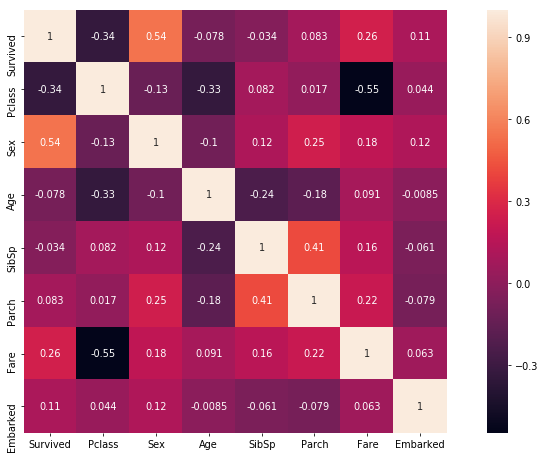

In [15]:
import seaborn as sns

plt.figure(figsize=(15, 8), dpi=70)
plt.subplot(1,1,1)

sns.heatmap(df2.corr(), square = True, annot = True)

/home/spawnqq/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


No sobrevivieron:  549 , corresponde un  61.75 %
Sobrevivieron:  340 , corresponde un  38.25 %


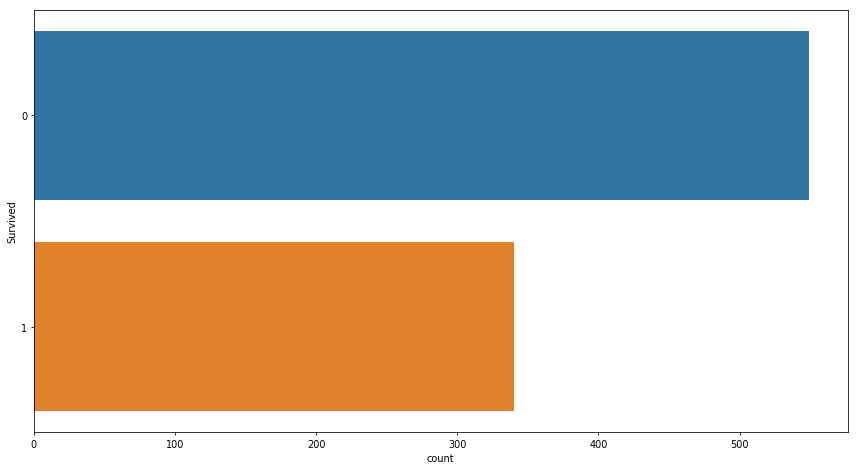

In [16]:
plt.figure(figsize=(15, 8), dpi=70)
plt.subplot(1,1,1)

sns.countplot(y='Survived',data=df2)

print ("No sobrevivieron: ",df2[df['Survived']==0]['Survived'].count(),", corresponde un ", round(df2[df['Survived']==0]['Survived'].count()/df2['Survived'].count()*100,2),"%")
print ("Sobrevivieron: ", df2[df['Survived']==1]['Survived'].count(),", corresponde un ",round(df2[df['Survived']==1]['Survived'].count()/df2['Survived'].count()*100,2),"%")

/home/spawnqq/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


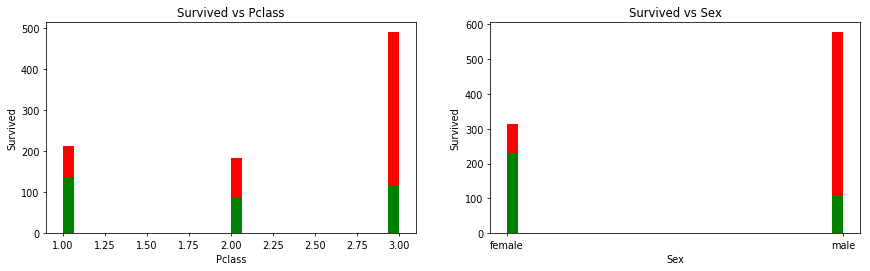

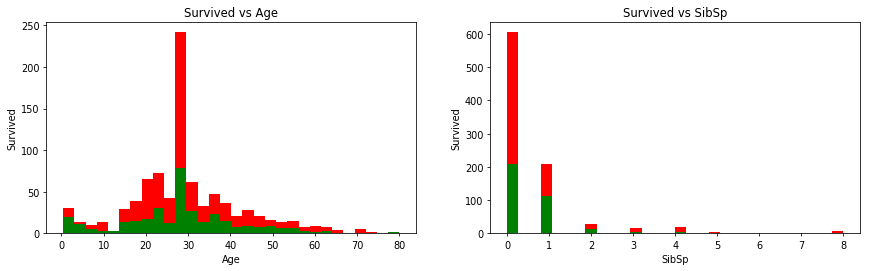

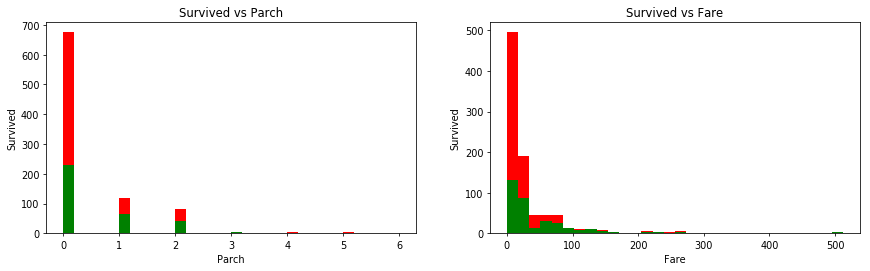

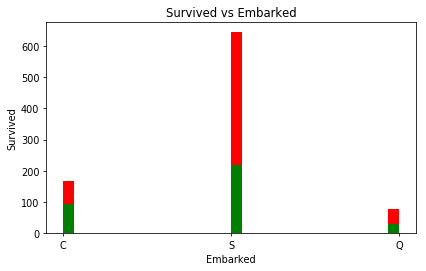

In [15]:
#Primer par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Survived vs Pclass")
plt.xlabel("Pclass")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Pclass'],df[df['Survived']==0]['Pclass']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])

plt.subplot(1,2,2)
plt.title("Survived vs Sex")
plt.xlabel("Sex")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Sex'],df[df['Survived']==0]['Sex']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])
plt.show()

#Segundo par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Survived vs Age")
plt.xlabel("Age")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])

plt.subplot(1,2,2)
plt.title("Survived vs SibSp")
plt.xlabel("SibSp")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['SibSp'],df[df['Survived']==0]['SibSp']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])
plt.show()

#Tercer par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Survived vs Parch")
plt.xlabel("Parch")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Parch'],df[df['Survived']==0]['Parch']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])

plt.subplot(1,2,2)
plt.title("Survived vs Fare")
plt.xlabel("Fare")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Fare'],df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])
plt.show()

#Cuarto par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Survived vs Embarked")
plt.xlabel("Embarked")
plt.ylabel("Survived")

plt.hist([df[df['Survived']==1]['Embarked'],df[df['Survived']==0]['Embarked']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Not survive','Survived'])

plt.show()

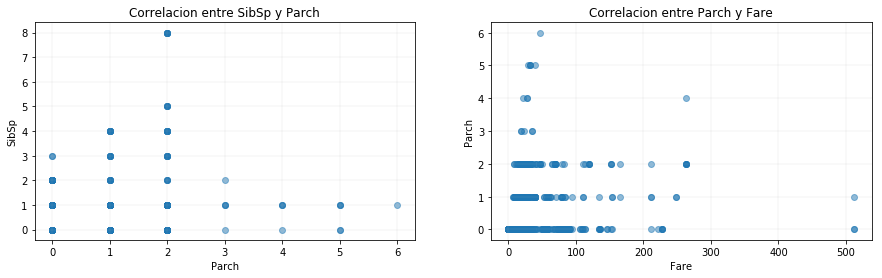

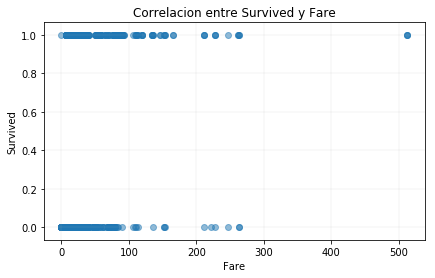

In [109]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1) 
ax.scatter(df2['Parch'],df2['SibSp'],alpha=.5)
plt.grid(True, linewidth=0.15)
plt.title('Correlacion entre SibSp y Parch')
plt.xlabel('Parch')
plt.ylabel('SibSp')

ax = fig.add_subplot(1,2,2) 
ax.scatter(df2['Fare'],df2['Parch'],alpha=.5)
plt.grid(True, linewidth=0.15)
plt.title('Correlacion entre Parch y Fare')
plt.xlabel('Fare')
plt.ylabel('Parch')

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1) 
ax.scatter(df2['Fare'],df2['Survived'],alpha=.5)
plt.grid(True, linewidth=0.15)
plt.title('Correlacion entre Survived y Fare')
plt.xlabel('Fare')
plt.ylabel('Survived')

plt.show()

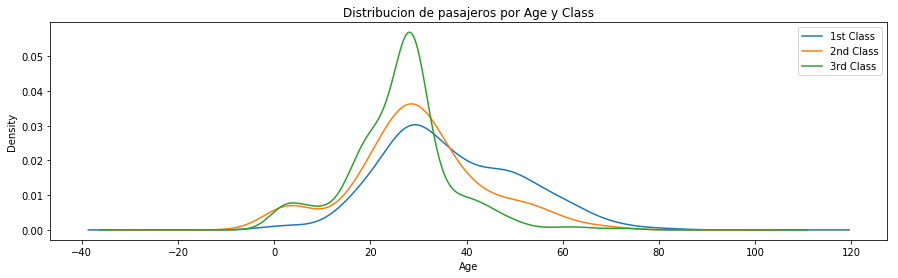

In [56]:
fig = plt.figure(figsize=(15,4))
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Distribucion de pasajeros por Age y Class")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

# Modelos predictivos

Creamos arreglos numpy, escalamos la variable X, por ultimo creamos las variables train y test

In [18]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data=df2['Survived'])

X = pd.DataFrame(data=df2.ix[:,1:8])

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


In [19]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [20]:
from patsy import dmatrices
import statsmodels.api as sm

model = sm.Logit(y,X)
residuo = model.fit()

residuo.summary2()

/home/spawnqq/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.450520
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: Survived         Pseudo R-squared: 0.323   
Date:               2018-06-10 15:25 AIC:              815.0253
No. Observations:   889              BIC:              848.5559
Df Model:           6                Log-Likelihood:   -400.51 
Df Residuals:       882              LL-Null:          -591.41 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Pclass      -0.6939    0.0912  -7.6045  0.0000  -0.8727  -0.5150
Sex          2.6856    0.1932  13.9021  0.0000   2.3069   3.0642
Age         -0.0195    0.0056  -3.4851  0.0005  -0.0304  -0.0085
SibSp       -0.2876    0.1028  -2.7967  0.0052  -0.4892  -0.0860
Parch       -0.0941    0.1157  -0.8137  0.4158  -0.3208   0.1326
Fare         0.0066    0.0026   2.5535  0.0107   0.0015   0.0117
Embarked     0.3902    0.1346   2.8997  0.0037   0.1265   0.6540
===============================================================

"""

Text(0,0.5,'Age')

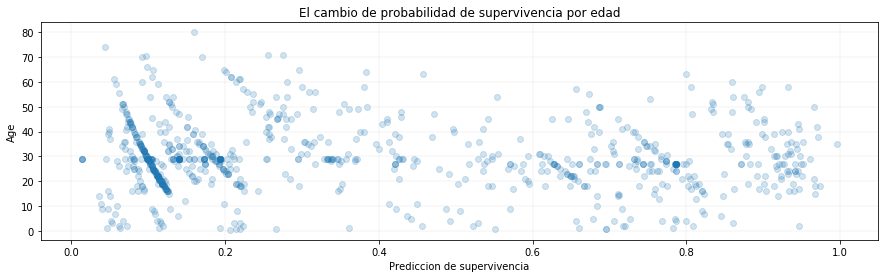

In [21]:
fig = plt.figure(figsize=(15,4))
plt.scatter(residuo.predict(),X['Age'] , alpha=.2)
plt.grid(True, linewidth=0.15)
plt.title("El cambio de probabilidad de supervivencia por edad")
plt.xlabel("Prediccion de supervivencia")
plt.ylabel("Age")

In [50]:
from random import randint

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2,random_state=randint(0, 10000),stratify=y)

print (X_train.shape, y_train.shape) 
print (X_test.shape, y_test.shape)

(711, 7) (711, 1)
(178, 7) (178, 1)


In [51]:
y_test.head()

,Survived
860,0
363,0
733,0
155,0
307,1


In [53]:
lm = LogisticRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

predictions

/home/spawnqq/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0])

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)

confusion_matrix

array([[97, 13],
       [19, 49]])

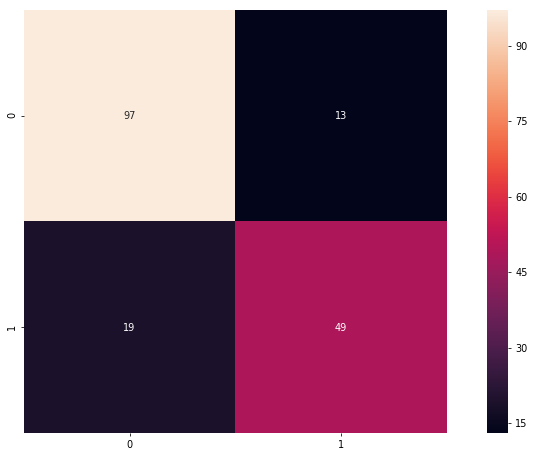

In [55]:
plt.figure(figsize=(15, 8), dpi=70)
plt.subplot(1,1,1)

sns.heatmap(confusion_matrix, square = True, annot = True)

Text(0,0.5,'Survived')

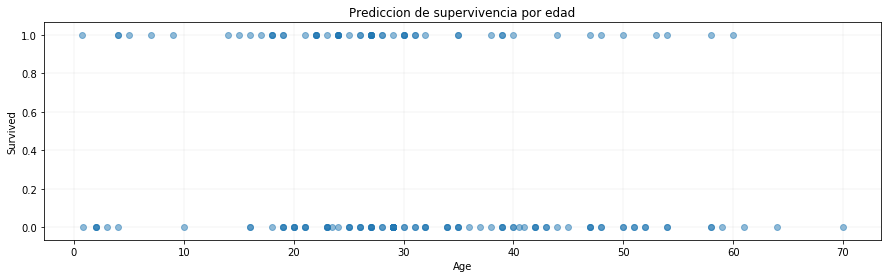

In [86]:
fig = plt.figure(figsize=(15,4))
plt.scatter(X_test['Age'],predictions , alpha=.5)
plt.grid(True, linewidth=0.15)
plt.title("Prediccion de supervivencia por edad")
plt.xlabel("Age")
plt.ylabel("Survived")

In [57]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       110
          1       0.79      0.72      0.75        68

avg / total       0.82      0.82      0.82       178



In [58]:
print ("Score:", model.score(X_test, y_test))

Score: 0.8202247191011236


In [59]:
from sklearn.tree import DecisionTreeClassifier

clf =  DecisionTreeClassifier ()
clf.fit(X_train, y_train)
C = clf.feature_importances_
for i in range(len((C))):
    print(X.columns[i], ': ', round(C[i]*100,2))

Pclass :  11.88
Sex :  30.53
Age :  25.51
SibSp :  5.15
Parch :  1.9
Fare :  23.11
Embarked :  1.92


In [60]:
prom_sur = 0
pred_sur = 0
for i in range(len(predictions)):
    if predictions[i] == 1:
        pred_sur = pred_sur + 1
    if y_test['Survived'].iloc[i] == 1:
        prom_sur = prom_sur + 1
        
prom_sur = (prom_sur / len(predictions) )* 100
pred_sur = (pred_sur / len(predictions) )* 100
tasa_error = ((prom_sur - pred_sur) / prom_sur) * 100

print("Real promedio Survived: ",round(prom_sur, 2),"%")
print("Prediccion promedio Survived: ",round(pred_sur,2),"%")

print("Tasa de error del: ",round(tasa_error,2),"%")

Real promedio Survived:  38.2 %
Prediccion promedio Survived:  34.83 %
Tasa de error del:  8.82 %


El modelo Logistic Regression tiene una certeza del 80.89%, lo que es bastante bueno, podemos ver la prediccion a partir de nuestro set de datos "y_test", el cual tiene una tasa de error del 17% con respecto a la tasa de supervivencia real.

Por otro lado verificaremos el modelo SVM para determinar la certeza del modelo.

In [61]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.1)
model_svm = svm.fit(X_train,y_train)
predictions_svm = model_svm.predict(X_test)

model_svm.score(X_test, y_test)

/home/spawnqq/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.797752808988764

In [62]:
prom_sur2 = 0
pred_sur2 = 0
for i in range(len(predictions_svm)):
    if predictions_svm[i] == 1:
        pred_sur2 = pred_sur2 + 1
    if y_test['Survived'].iloc[i] == 1:
        prom_sur2 = prom_sur2 + 1
        
prom_sur2 = (prom_sur2 / len(predictions_svm) )* 100
pred_sur2 = (pred_sur2 / len(predictions_svm) )* 100
tasa_error2 = ((prom_sur2 - pred_sur2) / prom_sur2) * 100

print("Real promedio Survived: ",round(prom_sur2, 2),"%")
print("Prediccion promedio Survived: ",round(pred_sur2,2),"%")

print("Tasa de error del: ",round(tasa_error2,2),"%")

Real promedio Survived:  38.2 %
Prediccion promedio Survived:  35.96 %
Tasa de error del:  5.88 %


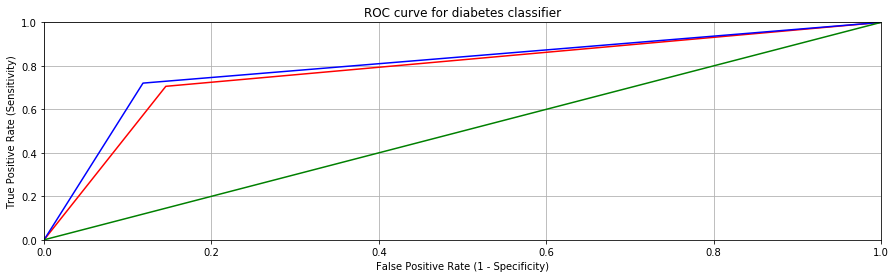

In [92]:
fig = plt.figure(figsize=(15,4))

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_svm)
plt.plot(fpr, tpr, color = 'r', label = 'SVM')

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, color = 'b', label = 'LR')

plt.plot([0.0, 1.0],[0.0, 1.0],'g')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

El modelo SVM tiene una certeza del 78.08%, lo que es bastante bueno, pero menos certero al modelo de Logistic Regression. Podemos ver la prediccion a partir de nuestro set de datos "y_test", el cual tiene una tasa de error del 7% con respecto a la tasa de supervivencia real.

In [35]:
test_titanic = pd.read_csv("test.csv")

test_titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
test_titanic['Age'] = test_titanic['Age'].replace(test_titanic[test_titanic.isnull()['Age'] == True][test_titanic['Sex']=='male']['Age'],test_titanic[test_titanic.isnull()['Age'] == False][test_titanic['Sex']=='male']['Age'].median())
test_titanic['Age'] = test_titanic['Age'].replace(test_titanic[test_titanic.isnull()['Age'] == True][test_titanic['Sex']=='female']['Age'],test_titanic[test_titanic.isnull()['Age'] == False][test_titanic['Sex']=='female']['Age'].median())


/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [37]:
test_titanic = test_titanic.dropna(subset=['Fare'])

In [38]:
test_titanic = test_titanic.drop(['Cabin'],1)
test_titanic = test_titanic.drop(['Ticket'],1)
test_titanic = test_titanic.drop(['Name'],1)
test_titanic = test_titanic.drop(['PassengerId'],1)

In [39]:
test_titanic['Embarked'] = test_titanic['Embarked'].replace(['S'],1)
test_titanic['Embarked'] = test_titanic['Embarked'].replace(['C'],2)
test_titanic['Embarked'] = test_titanic['Embarked'].replace(['Q'],3)

In [40]:
test_titanic['Sex'] = test_titanic['Sex'].replace(['male'],0)
test_titanic['Sex'] = test_titanic['Sex'].replace(['female'],1)

test_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


# Predicción de un un set de datos  

Se utilizaran los dos modelos propuestos para hacer una predicción a datos no testeados, por lo que solo se podrá obtener la predicción, no así la certeza de los modelos aplicados al set de datos.

In [41]:
import scikitplot as skpltprediccion_lm = model.predict(test_titanic)

psurv_lm = 0
for i in range(len(prediccion_lm)):
    if prediccion_lm[i] == 1:
        psurv_lm = psurv_lm + 1
        
psurv_lm = (psurv_lm / len(prediccion_lm) )* 100

print("Prediccion promedio Survived modelo Logistic Regression: ",round(psurv_lm,2),"%")

Prediccion promedio Survived modelo Logistic Regression:  35.73 %


In [42]:
prediccion_svm = model_svm.predict(test_titanic)

psurv_svm = 0
for i in range(len(prediccion_svm)):
    if prediccion_svm[i] == 1:
        psurv_svm = psurv_svm + 1
        
psurv_svm = (psurv_svm / len(prediccion_svm) )* 100

print("Prediccion promedio Survived modelo Support Vector Machine: ",round(psurv_svm,2),"%")

Prediccion promedio Survived modelo Support Vector Machine:  36.45 %


In [43]:
coincidencia = 0
for i in range(len(prediccion_svm)):
    if prediccion_svm[i] == prediccion_lm[i]:
        coincidencia = coincidencia + 1

coincidencia = (coincidencia / len(prediccion_svm))*100

print("Coincidencia en los casos, comparando ambos modelos : ",round(coincidencia,2),"%")

Coincidencia en los casos, comparando ambos modelos :  94.0 %
